# Train CNN with Face Emotion Dataset

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from util import gpusession
from model import basic_cnn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print ("Packages Loaded")

Packages Loaded


Load Face Emotion Dataset

In [2]:
loadpath = '../data/face_emotion.npz'
l = np.load(loadpath)
trainimg,trainlabel = l['trainimg'],l['trainlabel']
testimg,testlabel = l['testimg'],l['testlabel']
valimg,vallabel = l['valimg'],l['vallabel']
ntrain,ntest,nval = trainimg.shape[0],testimg.shape[0],valimg.shape[0]
X,Y,imgcnt,labels,xshp=l['X'],l['Y'],l['imgcnt'],l['labels'],l['rszshape']
nclass = Y.shape[1]
print ("[%d] images with xshape:[%s] and nclass:[%d]"%(X.shape[0],xshp,nclass))
print ("#Train:[%d] #Test[%d] #Validation[%d]"%(ntrain,ntest,nval))

[35886] images with xshape:[[64 64]] and nclass:[7]
#Train:[25120] #Test[7177] #Validation[3589]


Instantiate CNN

In [3]:
sess = gpusession()
C = basic_cnn(_name='Basic CNN for Face Emotions',_xtrain=trainimg,_ytrain=trainlabel,
             _xtest=testimg,_ytest=testlabel,_xval=valimg,_yval=vallabel,
             _xshp=xshp,_nclass=nclass,_labels=labels,_sess=sess,
             _batch_size=64,_lr=1e-3)

[Basic CNN for Face Emotions] Instantiated
 Input size:[[64 64]] #class:[7]
Trainable Variables
 [0] Name:[W/conv1/weights:0] Shape:[[3, 3, 1, 64]]
 [1] Name:[W/conv1/BatchNorm/beta:0] Shape:[[64]]
 [2] Name:[W/conv2/weights:0] Shape:[[3, 3, 64, 128]]
 [3] Name:[W/conv2/BatchNorm/beta:0] Shape:[[128]]
 [4] Name:[W/conv3/weights:0] Shape:[[3, 3, 128, 128]]
 [5] Name:[W/conv3/BatchNorm/beta:0] Shape:[[128]]
 [6] Name:[W/fc3/weights:0] Shape:[[8192, 1024]]
 [7] Name:[W/fc3/BatchNorm/beta:0] Shape:[[1024]]
 [8] Name:[W/out5/weights:0] Shape:[[1024, 7]]
 [9] Name:[W/out5/biases:0] Shape:[[7]]
Global Variables
 [0] Name:[W/conv1/weights:0] Shape:[[3, 3, 1, 64]]
 [1] Name:[W/conv1/BatchNorm/beta:0] Shape:[[64]]
 [2] Name:[W/conv1/BatchNorm/moving_mean:0] Shape:[[64]]
 [3] Name:[W/conv1/BatchNorm/moving_variance:0] Shape:[[64]]
 [4] Name:[W/conv2/weights:0] Shape:[[3, 3, 64, 128]]
 [5] Name:[W/conv2/BatchNorm/beta:0] Shape:[[128]]
 [6] Name:[W/conv2/BatchNorm/moving_mean:0] Shape:[[128]]
 [7] 

Update

[iter:0000]TrainLoss:[2.96e+00],TrainAccr:[13.77%],TestAccr:[13.45%]


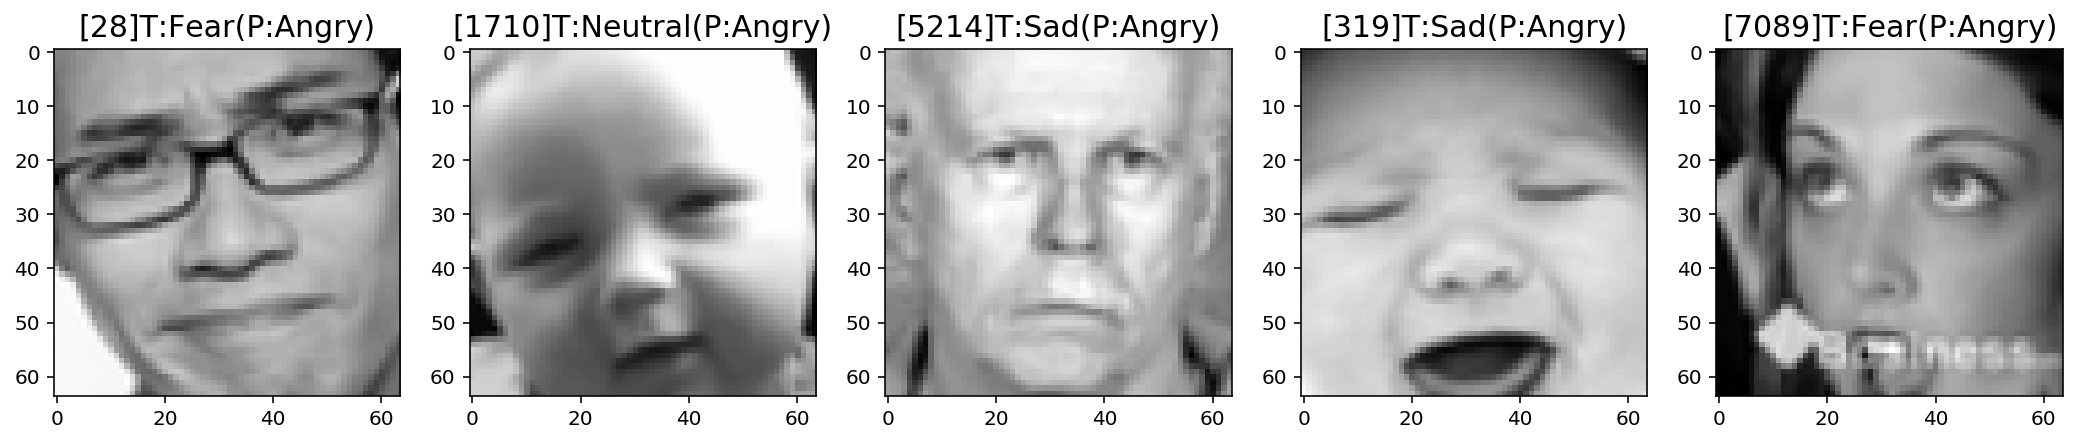

[iter:0500]TrainLoss:[1.23e+00],TrainAccr:[52.98%],TestAccr:[48.18%]
[iter:1000]TrainLoss:[9.15e-01],TrainAccr:[67.99%],TestAccr:[57.21%]


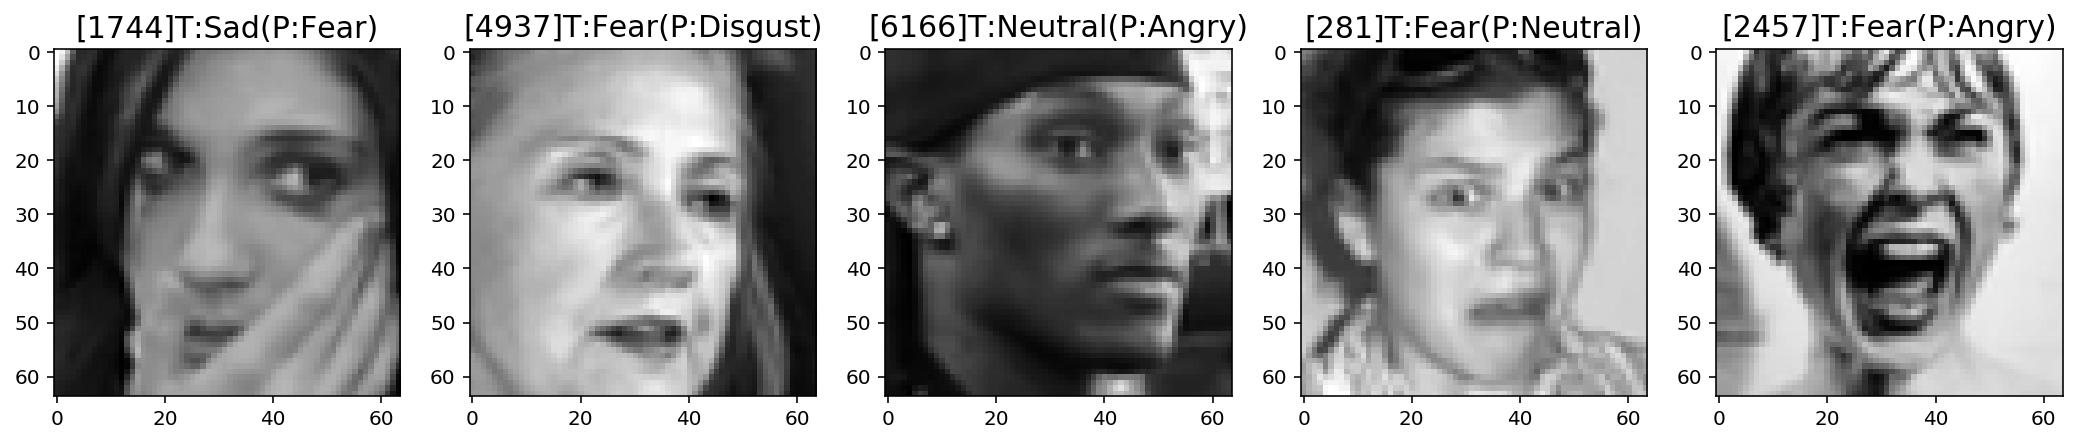

[iter:1500]TrainLoss:[6.30e-01],TrainAccr:[78.13%],TestAccr:[61.72%]
[iter:2000]TrainLoss:[5.31e-01],TrainAccr:[80.45%],TestAccr:[62.27%]


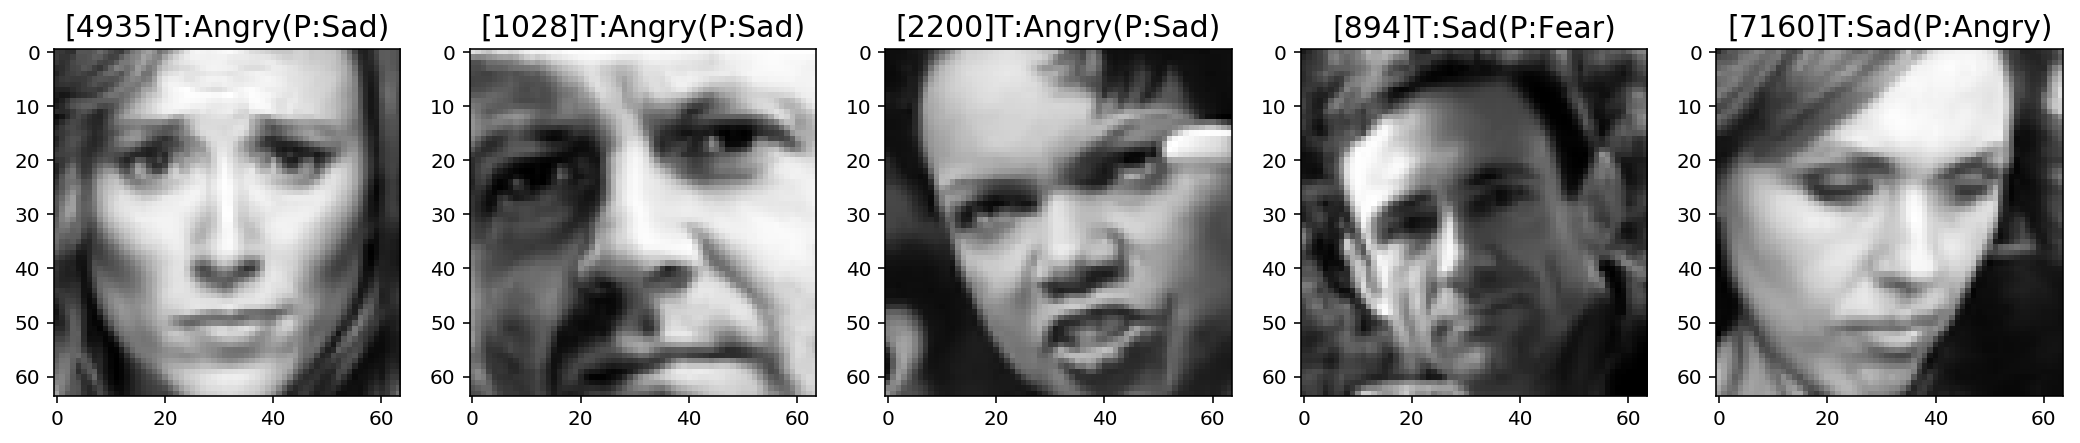

[iter:2500]TrainLoss:[2.33e-01],TrainAccr:[92.75%],TestAccr:[71.74%]
[iter:3000]TrainLoss:[1.86e-01],TrainAccr:[94.00%],TestAccr:[72.77%]


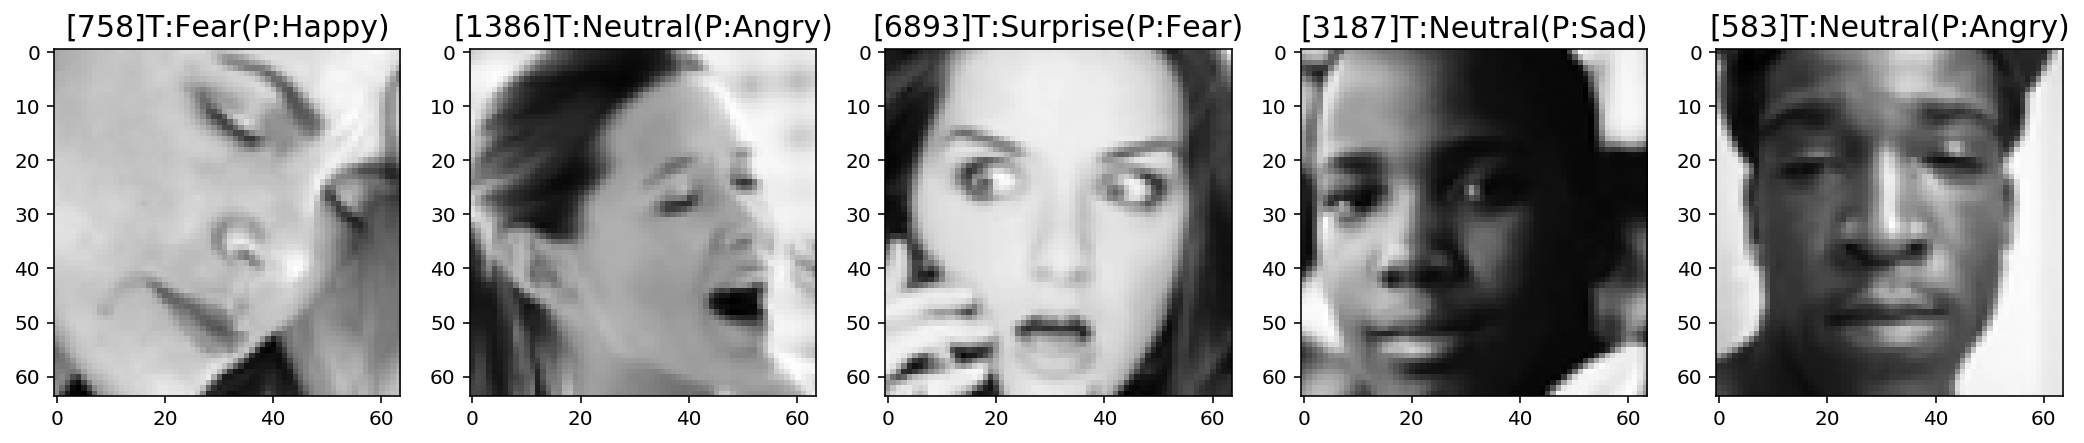

[iter:3500]TrainLoss:[8.57e-02],TrainAccr:[97.62%],TestAccr:[74.20%]
[iter:4000]TrainLoss:[6.06e-02],TrainAccr:[98.59%],TestAccr:[74.60%]


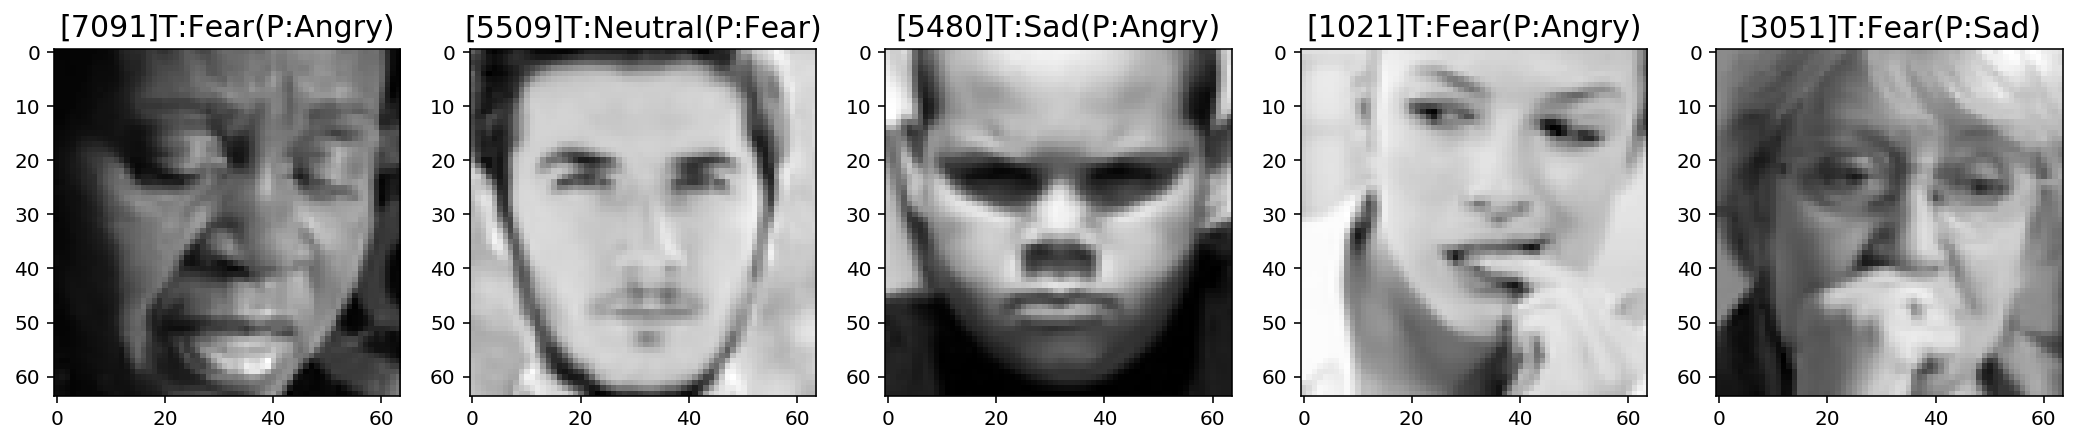

[iter:4500]TrainLoss:[6.85e-02],TrainAccr:[98.22%],TestAccr:[75.14%]
[iter:4999]TrainLoss:[5.85e-02],TrainAccr:[98.54%],TestAccr:[75.59%]
Done


In [4]:
C.init_weight()
maxiter = 5000
for iter in range(maxiter):
    """ Update """
    C.update()
    """ Print status """
    if (iter%(int)(maxiter/10))==0: C.print_status()
    """ Plot misclassified images"""
    if (iter%(int)(maxiter/5))==0: C.plot_misclassified()
C.print_status()
print ("Done")

Save

In [5]:
C.save(_savename='net/net_cnn.npz')

[net/net_cnn.npz] Saved. Size is [34.5]MB


Restore and Check

In [8]:
C.init_weight()
C.print_status()

[iter:0000]TrainLoss:[1.94e+00],TrainAccr:[24.04%],TestAccr:[23.34%]


In [ ]:
C.restore(_loadname='net/net_cnn.npz')
C.print_status()